In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data = pd.read_csv('adult_data.csv',header=0)

In [9]:
data.head()

,age,work_class,Fnlweight,Education,ed_num,Maaital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_Country,Income_Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
data.shape

(32561, 15)

In [29]:
data['Age']

0        39
1        50
2        38
3        53
4        28
5        37
6        49
7        52
8        31
9        42
10       37
11       30
12       23
13       32
14       40
15       34
16       25
17       32
18       38
19       43
20       40
21       54
22       35
23       43
24       59
25       56
26       19
27       54
28       39
29       49
         ..
32531    30
32532    34
32533    54
32534    37
32535    22
32536    34
32537    30
32538    38
32539    71
32540    45
32541    41
32542    72
32543    45
32544    31
32545    39
32546    37
32547    43
32548    65
32549    43
32550    43
32551    32
32552    43
32553    32
32554    53
32555    22
32556    27
32557    40
32558    58
32559    22
32560    52
Name: Age, Length: 32561, dtype: int64

In [19]:
data.replace(' ?',np.NaN,inplace=True)
print(data)
data = data.dropna()
print(data)
print(data.columns)

       age         work_class  Fnlweight     Education  ed_num  \
0        39         State-gov      77516     Bachelors      13   
1        50  Self-emp-not-inc      83311     Bachelors      13   
2        38           Private     215646       HS-grad       9   
3        53           Private     234721          11th       7   
4        28           Private     338409     Bachelors      13   
5        37           Private     284582       Masters      14   
6        49           Private     160187           9th       5   
7        52  Self-emp-not-inc     209642       HS-grad       9   
8        31           Private      45781       Masters      14   
9        42           Private     159449     Bachelors      13   
10       37           Private     280464  Some-college      10   
11       30         State-gov     141297     Bachelors      13   
12       23           Private     122272     Bachelors      13   
13       32           Private     205019    Assoc-acdm      12   
14       4

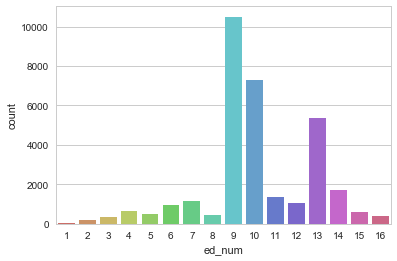

In [20]:
sns.countplot(x='ed_num', data=data, palette = 'hls')
plt.show()

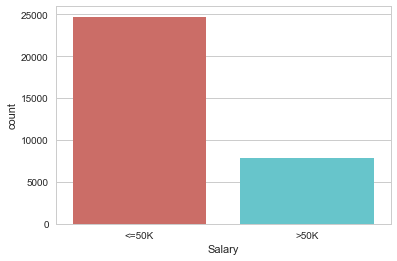

       Age        work_class  Fnlweight     Education  ed_num  \
0       39         State-gov      77516     Bachelors      13   
1       50  Self-emp-not-inc      83311     Bachelors      13   
2       38           Private     215646       HS-grad       9   
3       53           Private     234721          11th       7   
4       28           Private     338409     Bachelors      13   
5       37           Private     284582       Masters      14   
6       49           Private     160187           9th       5   
12      23           Private     122272     Bachelors      13   
13      32           Private     205019    Assoc-acdm      12   
15      34           Private     245487       7th-8th       4   
16      25  Self-emp-not-inc     176756       HS-grad       9   
17      32           Private     186824       HS-grad       9   
18      38           Private      28887          11th       7   
21      54           Private     302146       HS-grad       9   
22      35       Federal-

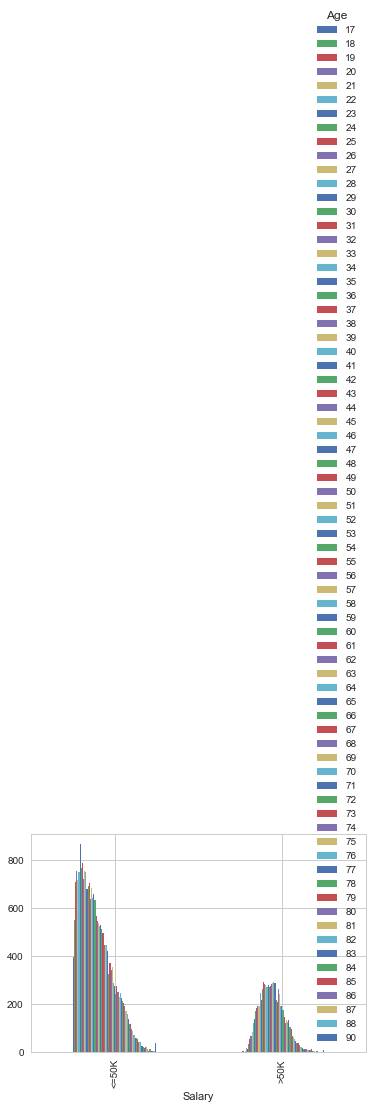

In [31]:
sns.countplot(x='Salary', data=data, palette = 'hls')
plt.show()
plt.savefig('count_plot')
pd.crosstab(data['Salary'],data['Age']).plot(kind='bar')
print(data[data['Salary']=='<=50K'])

       Age        work_class  Fnlweight     Education  ed_num  \
0       39         State-gov      77516     Bachelors      13   
1       50  Self-emp-not-inc      83311     Bachelors      13   
2       38           Private     215646       HS-grad       9   
3       53           Private     234721          11th       7   
4       28           Private     338409     Bachelors      13   
5       37           Private     284582       Masters      14   
6       49           Private     160187           9th       5   
12      23           Private     122272     Bachelors      13   
13      32           Private     205019    Assoc-acdm      12   
15      34           Private     245487       7th-8th       4   
16      25  Self-emp-not-inc     176756       HS-grad       9   
17      32           Private     186824       HS-grad       9   
18      38           Private      28887          11th       7   
21      54           Private     302146       HS-grad       9   
22      35       Federal-

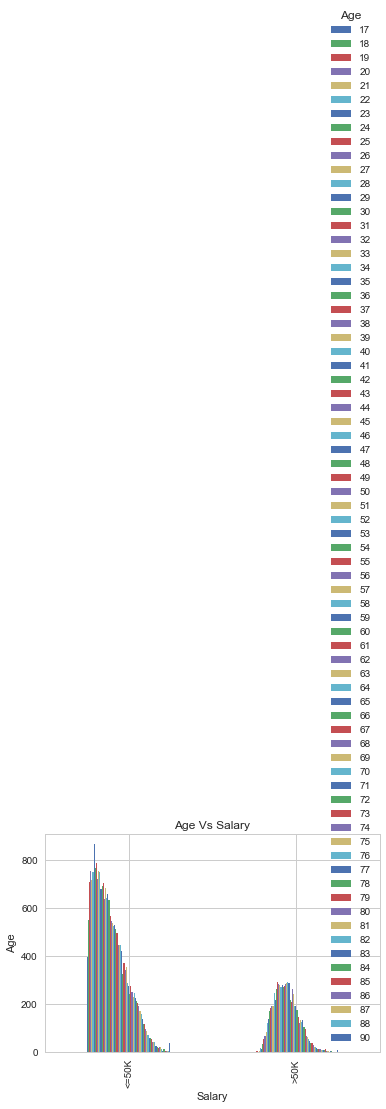

In [32]:
plt.savefig('count_plot')
pd.crosstab(data['Salary'],data['Age']).plot(kind='bar')
print(data[data['Salary']=='<=50K'])
plt.title('Age Vs Salary')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.savefig('purchase_fre_job')

"table=pd.crosstab(data['Salary'],data['Age'])  \ntable.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)\nplt.title('Stacked Bar Chart of  WorkClass vs Salary')\nplt.xlabel('Education')\nplt.ylabel('Proportion of Salary')\nplt.savefig('edu_vs_pur_stack')"

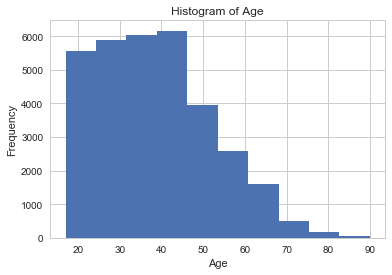

In [33]:

#trying
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')
data["Age"].hist()
"""table=pd.crosstab(data['Salary'],data['Age'])  
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  WorkClass vs Salary')
plt.xlabel('Education')
plt.ylabel('Proportion of Salary')
plt.savefig('edu_vs_pur_stack')"""

Text(0,0.5,'Proportion of Salary')

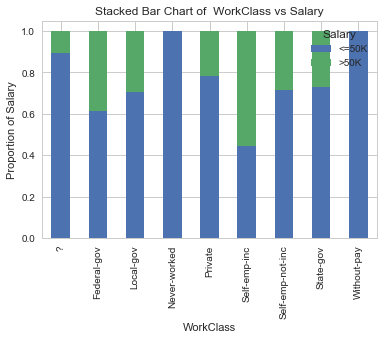

In [35]:
#keep trying
table=pd.crosstab(data['work_class'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  WorkClass vs Salary')
plt.xlabel('WorkClass')
plt.ylabel('Proportion of Salary')

In [36]:


#plt.savefig('edu_vs_pur_stack')
data.loc[data['Salary']==' <=50K', 'Salary']=0
data.loc[data['Salary']==' >50K', 'Salary']=1
list1=sorted(data['Age'].unique())
for i in list1:
    print(data[data['Age']==int(i)]['Salary'].value_counts())

<=50K    395
Name: Salary, dtype: int64
<=50K    550
Name: Salary, dtype: int64
<=50K    710
>50K       2
Name: Salary, dtype: int64
<=50K    753
Name: Salary, dtype: int64
<=50K    717
>50K       3
Name: Salary, dtype: int64
<=50K    752
>50K      13
Name: Salary, dtype: int64
<=50K    865
>50K      12
Name: Salary, dtype: int64
<=50K    767
>50K      31
Name: Salary, dtype: int64
<=50K    788
>50K      53
Name: Salary, dtype: int64
<=50K    722
>50K      63
Name: Salary, dtype: int64
<=50K    754
>50K      81
Name: Salary, dtype: int64
<=50K    748
>50K     119
Name: Salary, dtype: int64
<=50K    679
>50K     134
Name: Salary, dtype: int64
<=50K    690
>50K     171
Name: Salary, dtype: int64
<=50K    705
>50K     183
Name: Salary, dtype: int64
<=50K    639
>50K     189
Name: Salary, dtype: int64
<=50K    684
>50K     191
Name: Salary, dtype: int64
<=50K    643
>50K     243
Name: Salary, dtype: int64
<=50K    659
>50K     217
Name: Salary, dtype: int64
<=50K    635
>50K     263
Name: 

In [37]:


"""plt.title('Histogram of Fnlwgt')
plt.xlabel('Fnlwgt')
plt.ylabel('Frequency')
plt.savefig('hist_age')
data["Fnlwgt"].hist()
"""

'plt.title(\'Histogram of Fnlwgt\')\nplt.xlabel(\'Fnlwgt\')\nplt.ylabel(\'Frequency\')\nplt.savefig(\'hist_age\')\ndata["Fnlwgt"].hist()\n'

Text(0,0.5,'Proportion of Salary')

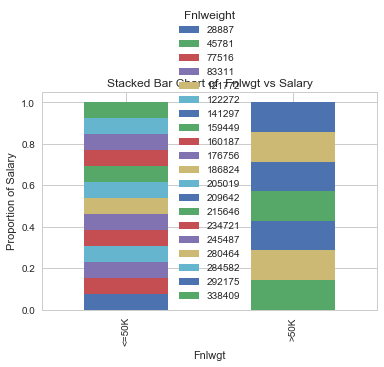

In [39]:

table=pd.crosstab(data['Salary'].head(20),data['Fnlweight'].head(20))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Fnlwgt vs Salary')
plt.xlabel('Fnlwgt')
plt.ylabel('Proportion of Salary')



Text(0,0.5,'Proportion of Salary')

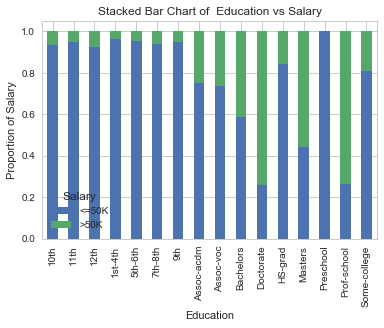

In [40]:

#plt.savefig('edu_vs_pur_stack')"""
table=pd.crosstab(data['Education'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Education vs Salary')
plt.xlabel('Education')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

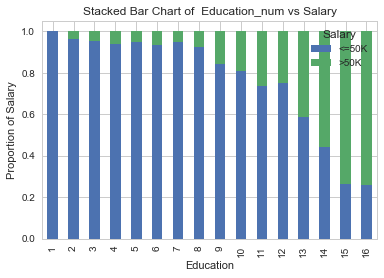

In [42]:
#next Education_num
table=pd.crosstab(data['ed_num'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Education_num vs Salary')
plt.xlabel('Education')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

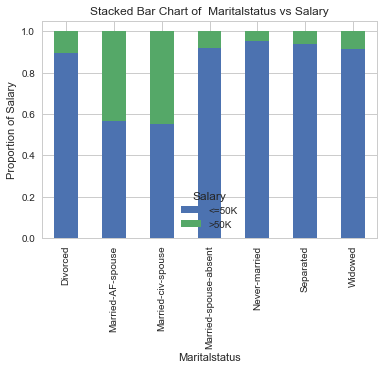

In [44]:
table=pd.crosstab(data['Maaital_status'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Maritalstatus vs Salary')
plt.xlabel('Maritalstatus')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

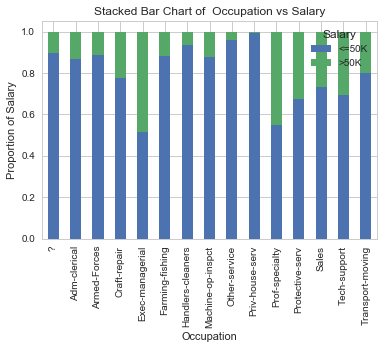

In [45]:
table=pd.crosstab(data['Occupation'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Occupation vs Salary')
plt.xlabel('Occupation')
plt.ylabel('Proportion of Salary')


Text(0,0.5,'Proportion of Salary')

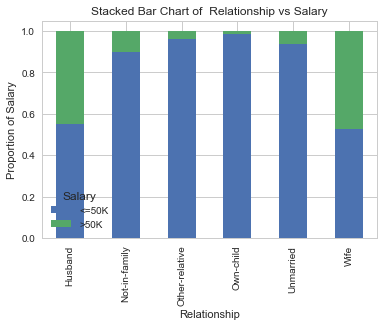

In [46]:
table=pd.crosstab(data['Relationship'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Relationship vs Salary')
plt.xlabel('Relationship')
plt.ylabel('Proportion of Salary')


Text(0,0.5,'Proportion of Salary')

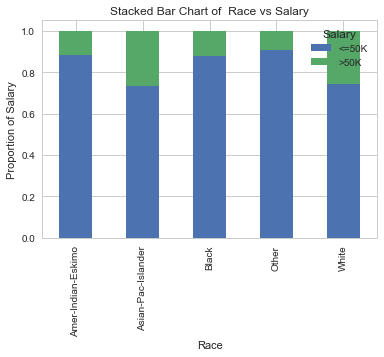

In [47]:
table=pd.crosstab(data['Race'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Race vs Salary')
plt.xlabel('Race')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

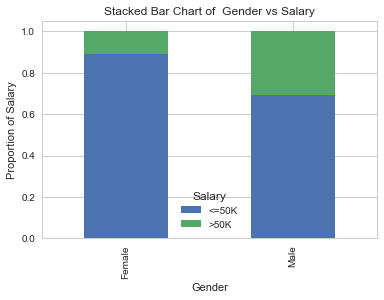

In [49]:
table=pd.crosstab(data['Sex'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

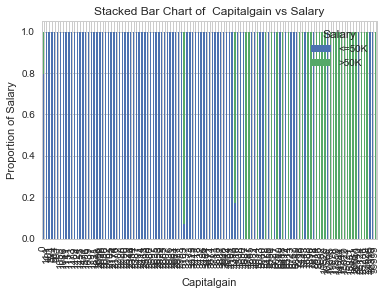

In [50]:
table=pd.crosstab(data['Capital_gain'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Capitalgain vs Salary')
plt.xlabel('Capitalgain')
plt.ylabel('Proportion of Salary')


Text(0,0.5,'Proportion of Salary')

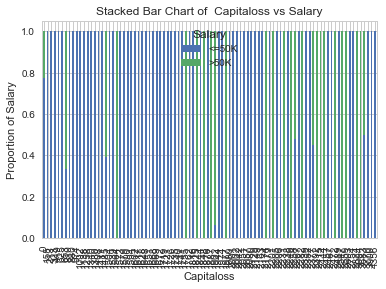

In [51]:




table=pd.crosstab(data['Capital_loss'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Capitaloss vs Salary')
plt.xlabel('Capitaloss')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

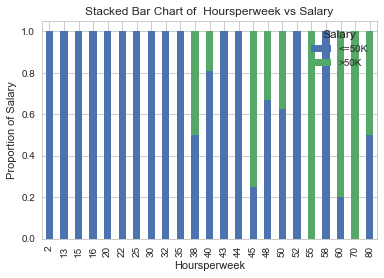

In [52]:
table=pd.crosstab(data['Hours_per_week'].head(100),data['Salary'].head(100))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Hoursperweek vs Salary')
plt.xlabel('Hoursperweek')
plt.ylabel('Proportion of Salary')


Text(0,0.5,'Proportion of Salary')

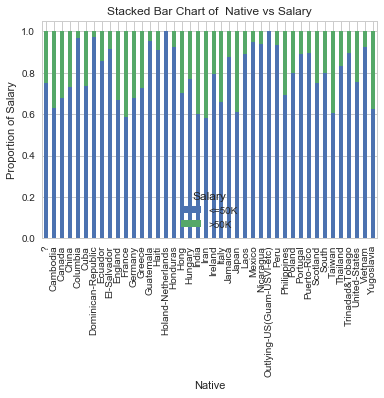

In [54]:

table=pd.crosstab(data['Native_Country'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Native vs Salary')
plt.xlabel('Native')
plt.ylabel('Proportion of Salary')


In [ ]:

#Important property according to data visualization
#Age
#WorkClass
#Education_num
#Occupation
#HoursPerweek

In [100]:
to_keep = [i for i in X.columns if i not in cat_vars] ## PREMA
X_Final = X[to_keep]
Y=data["Salary"]

In [102]:
X_Final.head()

,Age,Education,ed_num,Occupation,Hours_per_week,work_class_?,work_class_Federal-gov,work_class_Local-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Without-pay
0,39,Bachelors,13,Adm-clerical,40,0,0,0,0,0,0,0,1,0
1,50,Bachelors,13,Exec-managerial,13,0,0,0,0,0,0,1,0,0
2,38,HS-grad,9,Handlers-cleaners,40,0,0,0,0,1,0,0,0,0
3,53,11th,7,Handlers-cleaners,40,0,0,0,0,1,0,0,0,0
4,28,Bachelors,13,Prof-specialty,40,0,0,0,0,1,0,0,0,0


In [99]:
 
cat_vars=['work_class']
for i in cat_vars:
    cat_list = 'var'+'_'+i
    cat_list = pd.get_dummies(X[i],prefix=i)
    x1= X.join(cat_list)
    X=x1


ValueError: columns overlap but no suffix specified: Index(['work_class_?', 'work_class_Federal-gov', 'work_class_Local-gov',
       'work_class_Never-worked', 'work_class_Private',
       'work_class_Self-emp-inc', 'work_class_Self-emp-not-inc',
       'work_class_State-gov', 'work_class_Without-pay'],
      dtype='object')

In [95]:
 X

In [98]:
 X_Final.head

<bound method NDFrame.head of        Age        work_class     Education  ed_num         Occupation  \
0       39         State-gov     Bachelors      13       Adm-clerical   
1       50  Self-emp-not-inc     Bachelors      13    Exec-managerial   
2       38           Private       HS-grad       9  Handlers-cleaners   
3       53           Private          11th       7  Handlers-cleaners   
4       28           Private     Bachelors      13     Prof-specialty   
5       37           Private       Masters      14    Exec-managerial   
6       49           Private           9th       5      Other-service   
7       52  Self-emp-not-inc       HS-grad       9    Exec-managerial   
8       31           Private       Masters      14     Prof-specialty   
9       42           Private     Bachelors      13    Exec-managerial   
10      37           Private  Some-college      10    Exec-managerial   
11      30         State-gov     Bachelors      13     Prof-specialty   
12      23           

In [96]:
print(Y.shape)
print(X_Final.shape)

(32561,)
(32561, 15)


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Final, Y, test_size=0.99, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
#kfold = model_selection.KFold(n_splits=10, random_state=7)
#modelCV = LogisticRegression()
#scoring = 'accuracy'
#results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
#print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


ValueError: could not convert string to float: 'Private'

In [58]:

X=data[['Age','work_class','Education','ed_num','Occupation','Hours_per_week']]
print(X)
#using the new dataframe
cat_vars=['Work_class','Occupation','Education']
for i in cat_vars:
    cat_list = 'var'+'_'+i
    cat_list = pd.get_dummies(X[i],prefix=i)
    x1= X.join(cat_list)
    X=x1


       Age        work_class     Education  ed_num         Occupation  \
0       39         State-gov     Bachelors      13       Adm-clerical   
1       50  Self-emp-not-inc     Bachelors      13    Exec-managerial   
2       38           Private       HS-grad       9  Handlers-cleaners   
3       53           Private          11th       7  Handlers-cleaners   
4       28           Private     Bachelors      13     Prof-specialty   
5       37           Private       Masters      14    Exec-managerial   
6       49           Private           9th       5      Other-service   
7       52  Self-emp-not-inc       HS-grad       9    Exec-managerial   
8       31           Private       Masters      14     Prof-specialty   
9       42           Private     Bachelors      13    Exec-managerial   
10      37           Private  Some-college      10    Exec-managerial   
11      30         State-gov     Bachelors      13     Prof-specialty   
12      23           Private     Bachelors      13 

KeyError: 'Work_class'

In [68]:
to_keep = [i for i in X.columns if i not in cat_vars]
X_Final = X[to_keep]
Y=data["Salary"]
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logistic = LogisticRegression()
rfe = RFE(logistic,3)
rfe.fit(X_Final,Y)

ValueError: could not convert string to float: 'Self-emp-inc'

In [66]:
X_Final

,Age,work_class,ed_num,Hours_per_week
0,39,State-gov,13,40
1,50,Self-emp-not-inc,13,13
2,38,Private,9,40
3,53,Private,7,40
4,28,Private,13,40
5,37,Private,14,40
6,49,Private,5,16
7,52,Self-emp-not-inc,9,45
8,31,Private,14,50
9,42,Private,13,40


In [65]:
print(rfe)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=6, step=1, verbose=0)


In [60]:


print(rfe.support_)
print(rfe.ranking_)
selected_columns =[]
for i in range(len(rfe.support_)):
    if(rfe.support_[i] == True):
        selected_columns.append(to_keep[i])
 
X_Report = X_Final[selected_columns] 

ValueError: could not convert string to float: 'Self-emp-inc'

In [1]:
 

selected_columns =[]
for i in range(len(rfe.support_)):
    if(rfe.support_[i] == True):
        selected_columns.append(to_keep[i])
 
X_Report = X_Final[selected_columns]       

from scipy import stats
stats.chisqprob = lambda chisq, data: stats.chi2.sf(chisq,data)
import statsmodels.api as sm
logit_model=sm.Logit(Y,X_Report)
result=logit_model.fit()
print(result.summary())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Report, Y, test_size=0.99, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)     




/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


      39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
0      50, Self-emp-not-inc, 83311, Bachelors, 13, Ma...                                                                             
1      38, Private, 215646, HS-grad, 9, Divorced, Han...                                                                             
2      53, Private, 234721, 11th, 7, Married-civ-spou...                                                                             
3      28, Private, 338409, Bachelors, 13, Married-ci...                                                                             
4      37, Private, 284582, Masters, 14, Married-civ-...                                                                             
5      49, Private, 160187, 9th, 5, Married-spouse-ab...                                                                             
6      52, Self-emp-not-inc, 209642, HS-grad, 9, Marr...      

ValueError: Could not interpret input 'Salary'